# Demo 1: Inference with Neural Networks

* Using TensorFlow and Keras
* Expected time: 5 minutes

In this demo, I will demonstrate that with input/output representations and a trained neural network (NN), we can use the trained NN for inference, i.e. performing prediction.

## Step 1: Import Dependencies

These libraries are used for the code shown later in this notebook, so we take care of that first. Usually, import statements are written "on-the-go", i.e. add lines of imports as new imports become needed. My recommended workflow is to develop solutions using a proper IDE first and then to transform it into a notebook.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load a Neural Network

In [2]:
model = ResNet50(weights='imagenet')

2022-02-01 15:05:28.626422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 15:05:28.631525: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 15:05:28.632137: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-01 15:05:28.633492: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Step 3: Massage the Input

For the following chunks of code, Carefully read each line and ask yourselves what each line is precisely doing.

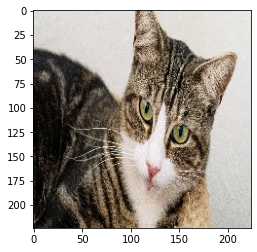

In [3]:
# To load the cat image and display...
img_path = 'cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)

In [5]:
# To put the image into a format the model can understand...
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Q: What do you expect to see if I print the variable `x`?
* A. "cat" or something like that
* B. The image of the cat, same as above
* C. A 2-dimensional array representing the RGB values of the cat image
* D. None of the above

In [6]:
print(x)
print(x.shape)

[[[[ 111.061  103.221   95.32 ]
   [ 106.061   98.221   90.32 ]
   [ 114.061  106.221   98.32 ]
   ...
   [ 130.061  121.221  115.32 ]
   [ 117.061  108.221  102.32 ]
   [ 124.061  115.221  109.32 ]]

  [[ 113.061  105.221   97.32 ]
   [ 110.061  102.221   94.32 ]
   [ 119.061  111.221  103.32 ]
   ...
   [ 124.061  115.221  109.32 ]
   [ 127.061  118.221  112.32 ]
   [ 121.061  112.221  106.32 ]]

  [[ 116.061  108.221  100.32 ]
   [ 114.061  105.221   99.32 ]
   [ 112.061  103.221   97.32 ]
   ...
   [ 125.061  116.221  110.32 ]
   [ 123.061  114.221  108.32 ]
   [ 126.061  117.221  111.32 ]]

  ...

  [[ -68.939  -78.779  -77.68 ]
   [ -85.939  -97.779 -100.68 ]
   [ -67.939  -79.779  -82.68 ]
   ...
   [  81.061   74.221   66.32 ]
   [  85.061   78.221   70.32 ]
   [  95.061   88.221   80.32 ]]

  [[ -89.939  -99.779 -101.68 ]
   [ -90.939 -104.779 -107.68 ]
   [ -69.939  -84.779  -85.68 ]
   ...
   [  81.061   74.221   66.32 ]
   [  96.061   89.221   81.32 ]
   [  82.061   75.221 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


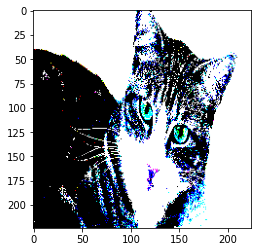

In [7]:
plt.imshow(x[0])

## Step 4: Perform Prediction

In [8]:
# To produce the model's prediction corresponding to the input...
with tf.device('/cpu'):
    preds = model.predict(x)

2022-02-01 15:06:24.658413: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Q: What do you expect to see if I print the variable `preds`?
* A. "cat" or something like that
* B. A strange sea of numbers
* C. None of the above

In [9]:
print(preds)
print(preds.shape)

[[1.60392162e-08 3.56432430e-08 1.06340812e-08 1.75319599e-07
  7.48325633e-08 5.82325477e-08 5.33813669e-08 3.43930168e-07
  1.69760199e-07 6.02049326e-08 5.45934071e-08 1.72765304e-08
  1.83238484e-07 3.42927464e-08 4.77513362e-09 1.38984745e-07
  1.08139737e-08 2.67695777e-09 1.64396923e-08 3.28706062e-09
  1.30178215e-08 1.23413741e-08 3.89864638e-08 2.80310928e-07
  3.17563445e-06 2.70400657e-09 1.49830779e-08 1.21314674e-08
  4.89048047e-09 8.73845174e-09 4.24859294e-08 9.51176915e-09
  7.06187686e-09 2.39777465e-09 4.84993592e-08 1.40459333e-08
  7.83053196e-08 6.28329104e-08 7.01429173e-08 5.66208485e-07
  1.33847378e-08 6.72617489e-07 9.31924617e-08 3.46093202e-07
  1.43109844e-07 6.50960672e-08 3.09357915e-07 1.57023710e-08
  1.27152759e-07 5.90074478e-09 1.51601576e-08 1.83326517e-06
  6.52290524e-08 2.98539971e-09 2.18595826e-08 3.75126561e-08
  2.03620365e-09 1.20113501e-08 8.82748985e-09 8.39322656e-09
  5.92002536e-08 1.68753207e-08 1.80832131e-08 8.43920223e-09
  1.2896

What is this impenetrable sea of numbers? Well, maybe it's a bit easier to see if we visualized this...

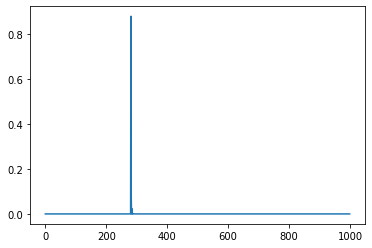

In [10]:
plt.plot(np.arange(len(preds[0])), preds[0])

Q: Why do you think there's a "spike" around 280?

In [46]:
np.argmax(preds[0])

281

So the model's output `preds` is telling us something like:

```
Out of the 1000 categories of things, the input is likely to be in category 281
```

Decoding thie output more precisely is the matter of looking at the "legends" and finding out what the category 281 is. In our case, the model was trained on a dataset called ImageNet to produce predictions spanning 1000 categories. The documentation for the categories for this dataset is found here: https://github.com/raghakot/keras-vis/blob/master/resources/imagenet_class_index.json

In [47]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.88082504), ('n02123159', 'tiger_cat', 0.094144456), ('n02124075', 'Egyptian_cat', 0.022609562)]
